In [1]:
import TAPpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
idx = pd.IndexSlice

testDirectory = './water/'
logFile = testDirectory + 'lammps.log'
trajectoryFile = testDirectory + 'dump.trj'
dataFile = testDirectory + 'data.lmp'
molDict = {r'H$_2$O':2133}

In [2]:
testDirectory = './K_id/'
logFile = testDirectory + 'lammps.log'
trajectoryFile = testDirectory + 'dump.trj'
dataFile = testDirectory + 'data.lmp'
molDict = {r'H$_2$O':2133,r'K$^+$':1}

In [16]:
testDirectory = './Cl_id/'
logFile = testDirectory + 'lammps.log'
trajectoryFile = testDirectory + 'dump.trj'
dataFile = testDirectory + 'data.lmp'
molDict = {r'H$_2$O':2133,r'Cl$^-$':1}

In [10]:
testDirectory = './KCl/'
logFile = testDirectory + 'lammps.log'
trajectoryFile = testDirectory + 'dump.trj'
dataFile = testDirectory + 'data.lmp'
molDict = {r'H$_2$O':2133,r'K$^+$':106,r'Cl$^-$':106}

In [17]:
testDomain = TAPpy.Domain(molDict=molDict)
testDomain.readInputs(dataFile,logFile,trajectoryFile)
testDomain.calcDisplacement()
testDomain.calcMSD()
testDomain.calcDiffusivity()

Reading LAMMPS data file.
Reading LAMMPS log file.
Reading LAMMPS trajectory file.
Performing analysis for: 2133 H$_2$O, 1 Cl$^-$.


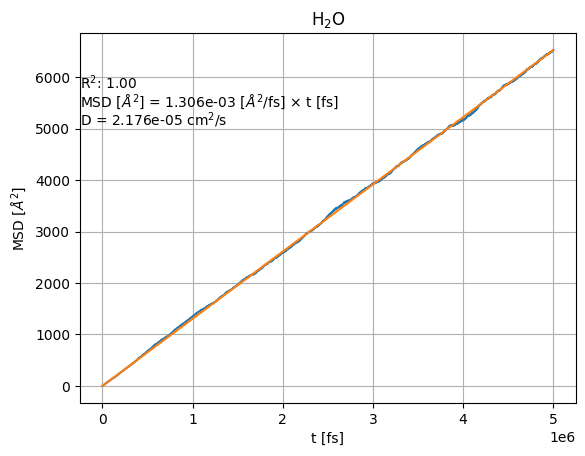

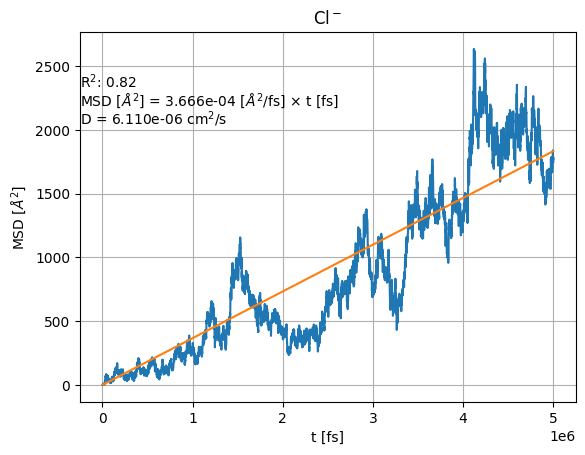

In [18]:
for key in testDomain.MSDDFDict:
    MSDDF = testDomain.MSDDFDict[key]
    x = MSDDF.index.to_numpy().reshape(-1,1)
    y = MSDDF.to_numpy()
    regression = sklearn.linear_model.LinearRegression(fit_intercept=False).fit(x,y)

    fig,ax = plt.subplots()
    ax.plot(x,y)
    ax.plot(x,regression.predict(x))
    ax.grid()
    
    ax.annotate(r'R$^2$: {0:.2f}'.format(regression.score(x,y)),xy=(0,0.85),xycoords='axes fraction')
    ax.annotate(r'MSD [$\AA ^2$] = {0:.3e} [$\AA ^2$/fs] $\times$ t [fs]'.format(regression.coef_[0]),xy=(0,0.80),xycoords='axes fraction')
    ax.annotate(r'D = {0:.3e} cm$^2$/s '.format(regression.coef_[0]*1e-8*1e-8/1e-15/6),xy=(0,0.75),xycoords='axes fraction')

    ax.set_ylabel(r'MSD [$\AA ^2$]')
    ax.set_xlabel(r't [fs]')
    ax.set_title(key)

In [7]:
# TAPpy.output.plotDiffusivity(testDomain,'check.jpg')
print(testDomain.diffusivityDict)

{'H$_2$O': array([2.19052827e-05])}


In [2]:
testDomain = TAPpy.Domain(molDict=molDict)
testDomain.readInputs(dataFile,logFile,trajectoryFile)
testDomain.calcMSDWindow()


Reading LAMMPS data file.
Reading LAMMPS log file.
Reading LAMMPS trajectory file.
Performing analysis for: 2133 H$_2$O.
